<a href="https://colab.research.google.com/github/khajafaizahmed/Critters-Game/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: RREF form, finding fit functions given data, and matrix arithmetics-application in image processing
## Complete the lab, by running the code, some times adding your own code or writing documentations to explain the code

In [144]:
# import libraries
import numpy as np
import scipy as sp
import sympy
import matplotlib.pyplot as plt
from PIL import Image

The Python library sympy computes REF and RREF. We will try a couple of matrices here. In general though, the operation is not very accurate.

In [167]:
# generate a random matrix of size 4 by 4
A = np.random.random((4,4))

# find the rref form of A

rA = sympy.Matrix(A).rref()

# uncomment below to se the RREF of matrix
print(rA)

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]]), (0, 1, 2, 3))


## We solved the system in class from the electrical networks. Now we are solving the system with Python. Notice this system is not square, so we will be using a different command (we did this in lab0).

We know:

for node A: $-i_1+i_2-i_3=0$

node B: $i_1-i_2+i_4=0$

node C: $i_3-i_5+i_6=0$

node D: $-i_4+i_5-i_6=0$

top loop: $4i_1+2i_2=8$

middle loop: $2i_2+4i_5=0$

bottom loop: $4i_5+5i_6=10$

And our goal is to find the currents.


In [181]:
# Define coefficient matrix and right hand side vector

B = np.array([
    [-1, 1, -1, 0,  0,  0],   # node A
    [ 1,-1,  0, 1,  0,  0],   # node B
    [ 0, 0,  1, 0, -1,  1],   # node C
    [ 0, 0,  0,-1,  1, -1],   # node D
    [ 4, 2,  0, 0,  0,  0],   # top loop
    [ 0, 2,  0, 0,  4,  0],   # middle loop
    [ 0, 0,  0, 0,  4,  5]    # bottom loop
])
b = np.array([0,0,0,0,8,0,10])

# solve the system by uncommenting the following line
x = np.linalg.lstsq(B,b)

# type in x = np.linalg.solve(B,b) and run. Paste the last line of your error message here.
# LinAlgError: Last 2 dimensions of the array must be square


Notice the solution you get is not nice clean integer solutions like what we got in class. Why is that?

Ans:

## Data fitting eventually comes down to solving a linear system. You are given $N$ pairs of data points $(x_i,y_i)$, and your goal is to find a curve (or function) $y=f(x)$. We normally try some reasonable ones and choose one that works the best.

### Consider a set of data points y = [0.892, 1.44, 1.31, 1.66, 1.10, 1.19], and x = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]. We try a polynomial fit.

In [183]:
# We guess that the function is of the form y = f(x)=c0+c1*x+c2*x^2+...+c5*x^5. Our goal is to
# find the coefficients c0,...,c5

# you will see some array handle with numpy here

C = np.zeros((6,6))

# type print(C) below and run to see what the command np.zeros((m,n)) does
print(C)
# define the data points

x = np.transpose(np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]))

y = np.transpose(np.array([0.892, 1.44, 1.31, 1.66, 1.10, 1.19]))


C[:,0] = np.ones((6,))
C[:,1] = x
C[:,2] = x**2
C[:,3] = x**3
C[:,4] = x**4
C[:,5] = x**5


print(C)
# type print(C) to see the output

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 2.0000e-01 4.0000e-02 8.0000e-03 1.6000e-03 3.2000e-04]
 [1.0000e+00 4.0000e-01 1.6000e-01 6.4000e-02 2.5600e-02 1.0240e-02]
 [1.0000e+00 6.0000e-01 3.6000e-01 2.1600e-01 1.2960e-01 7.7760e-02]
 [1.0000e+00 8.0000e-01 6.4000e-01 5.1200e-01 4.0960e-01 3.2768e-01]
 [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]]


In [186]:
# build coefficient matrix: each row means f(xi) = yi, or c0+c1*xi+c2*xi^2+...+c5*xi^5 = yi

for i in range(2,6):
    C[:,i] = np.power(C[:,1],i)

# type print(C) to see the form of coefficient matrix

print(C)

[[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 2.0000e-01 4.0000e-02 8.0000e-03 1.6000e-03 3.2000e-04]
 [1.0000e+00 4.0000e-01 1.6000e-01 6.4000e-02 2.5600e-02 1.0240e-02]
 [1.0000e+00 6.0000e-01 3.6000e-01 2.1600e-01 1.2960e-01 7.7760e-02]
 [1.0000e+00 8.0000e-01 6.4000e-01 5.1200e-01 4.0960e-01 3.2768e-01]
 [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]]


In [187]:
# solve the system with np.linalg.solve

coef = np.linalg.solve(C,y)

# print coef and run to see the coefficients.
print("Fitted coefficients:")
for i, c in enumerate(coef):
    print(f"c{i} = {c:.6f}")

Fitted coefficients:
c0 = 0.892000
c1 = 15.048000
c2 = -109.416667
c3 = 304.197917
c4 = -352.708333
c5 = 143.177083


Now you have found the polynomial fit for the data. We will plot the data points and the fitting curve.

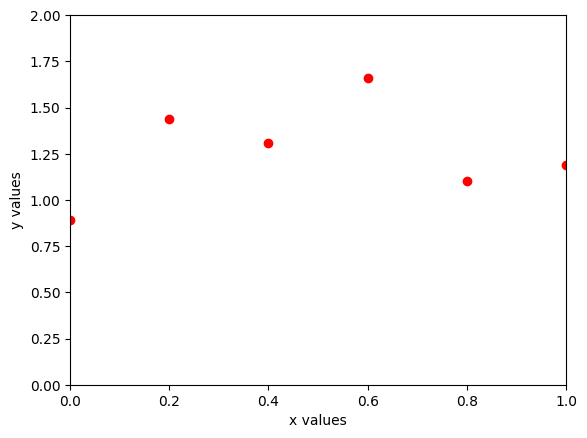

In [189]:
# plot data points x and y

plt.plot(x, y, 'ro')
plt.axis([0, 1, 0, 2])
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

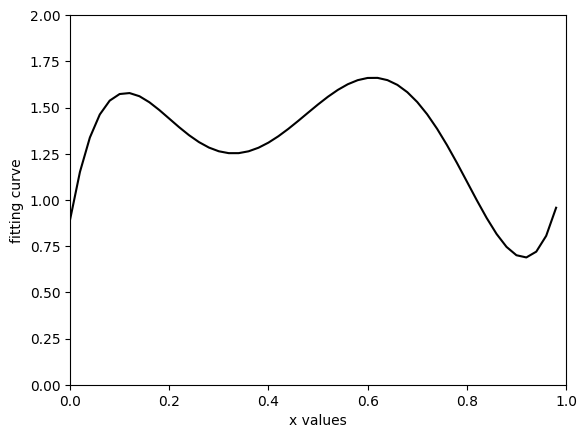

In [193]:
# plot fitting curve, call coef from above linear system

xx = np.arange(0,1,0.02)

# google a little bit to see how to define polynomials with coefficients. Paste the url of your result below after a #
# answer:
# A polynomial is defined as an expression which is composed of variables, constants and exponents, that
#are combined using mathematical operations such as addition, subtraction,
# multiplication and division (No division operation by a variable).
# https://byjus.com/maths/polynomial/
# need to flip coef, as poly1d builds polynomial in the descending order of power of x
coefficient = np.flip(coef)

f = p = np.poly1d(coefficient)

plt.plot(xx, f(xx), 'k')
plt.axis([0, 1, 0, 2])
plt.xlabel('x values')
plt.ylabel('fitting curve')
plt.show()

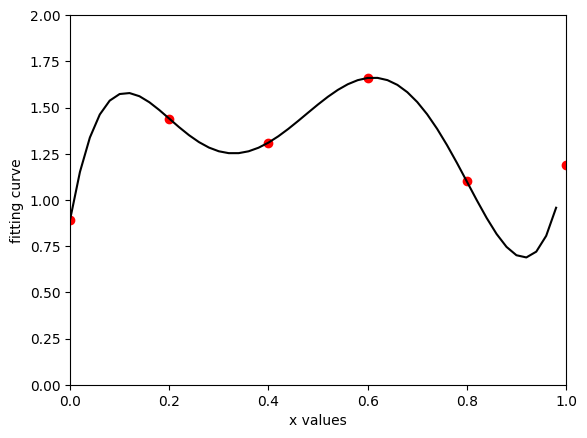

In [194]:
# uncomment below code to show the data points and fitting curve in the same figure

plt.plot(x, y, 'ro')
plt.plot(xx, f(xx), 'k')
plt.axis([0, 1, 0, 2])
plt.ylabel('fitting curve')
plt.xlabel('x values')
plt.show()

## In this part, we make our own knock off of photoshop.
Digital photos are represented by arrays of numbers. We handle them as arrays (therefore matrices) and play with the matrix operations.

We will pre process the images from the raw import format to arrays.

_Only run one of the two cells from below and skip the other_

In [195]:
############ If using Google Colab, run this cell to use images from url
import requests
from io import BytesIO

url_moon = 'https://raw.githubusercontent.com/yajuna/tmath308/master/pexels_moon.jpeg'
page_moon = requests.get(url_moon)
moon = Image.open(BytesIO(page_moon.content))

url_person = 'https://raw.githubusercontent.com/yajuna/tmath308/master/pexels_person.jpeg'
page_person = requests.get(url_person)
person = Image.open(BytesIO(page_person.content))

In [154]:
### DO NOT RUN THIS CELL
############# If using Binder, run this cell to use images from github repository

# import images Pillow
# person = Image.open("pexels_person.jpeg")
# moon = Image.open("pexels_moon.jpeg")


<Figure size 640x480 with 0 Axes>

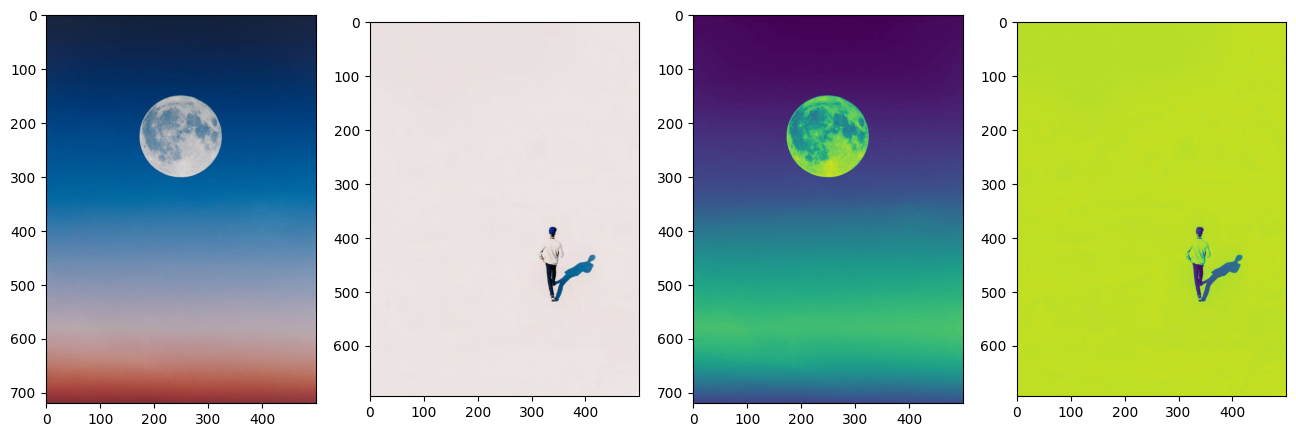

In [155]:
# color to grayscale
personGray = person.convert('L')
moonGray = moon.convert('L')
######
# uncomment and run to show images

plt.figure()
# subplot(r,c) #provide the no. of rows and columns
f, axarr = plt.subplots(1,4,figsize=(16, 12))

# use the created array to output your multiple images. In this case we have four images horizontally
axarr[0].imshow(moon)
axarr[1].imshow(person)
axarr[2].imshow(moonGray)
axarr[3].imshow(personGray)

plt.show()

In [201]:
# check the data type
type(person)
type(moon)

PIL.JpegImagePlugin.JpegImageFile

In [196]:
# run this cell
# convert image file to array

personArray = np.asarray(personGray)
moonArray = np.asarray(moonGray)

# check data size

dim_person = np.shape(personArray)
dim_moon = np.shape(moonArray)

print(dim_person,dim_moon) # check size of images for matrix computation (694, 500) (720, 500)

(694, 500) (720, 500)


In [199]:
# cut moon image so that two images are of the same size, run the code to see new shape

moonArray1 = moonArray[:694,]
print(np.shape(moonArray1)) #(694, 500)

(694, 500)


In [203]:
# print a small portion of the data, paste what you see in the end after 'dtype = '
# ans: dtype = Array

personArray[0:5,34:54]
print("dtype =", personArray.dtype)


dtype = uint8


### In this part, we deal with data types

In [205]:
# run the code, and print a small portion similar to above to see what values you get

addImage = (personArray + moonArray1)/2

[[ 3.5  3.5  3.5 ...  5.   5.   5. ]
 [ 3.5  3.5  3.5 ...  5.   5.   5. ]
 [ 3.5  3.5  3.5 ...  5.   5.   5. ]
 ...
 [36.5 36.5 36.5 ... 49.  49.  49. ]
 [36.  36.  36.  ... 49.  49.  49. ]
 [35.5 35.5 35.5 ... 48.5 48.5 48.5]]


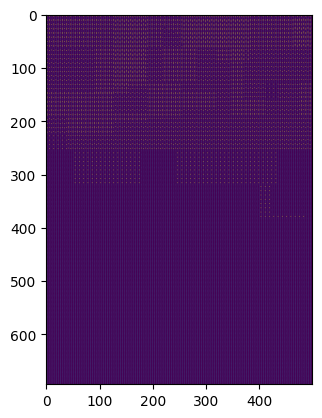

In [220]:
# print addImage to see what happens

im_add1 = Image.fromarray(addImage, 'L')

imgplot = plt.imshow(im_add1)
print(addImage)
# is it what you expected? why or why not?
#No, This is because if addImage contains values outside the range [0, 255]

In [217]:
# run the code, and print a small portion similar to above to see what values you get

personF = personArray.astype('float')
moonF = moonArray1.astype('float')
additionF = (personF + moonF)/2
addition = additionF.astype('uint8')

print(personF[0:5,34:54])
print(addition[0:5,34:54])

[[227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227.
  227. 227. 227. 227. 227. 227.]
 [227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227.
  227. 227. 227. 227. 227. 227.]
 [227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227.
  227. 227. 227. 227. 227. 227.]
 [227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227.
  227. 227. 227. 227. 227. 227.]
 [227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227. 227.
  227. 227. 227. 227. 227. 227.]]
[[131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131
  131 131]
 [131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131
  131 131]
 [131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131
  131 131]
 [131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131
  131 131]
 [131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131 131
  131 131]]


[[131 131 131 ... 133 133 133]
 [131 131 131 ... 133 133 133]
 [131 131 131 ... 133 133 133]
 ...
 [164 164 164 ... 177 177 177]
 [164 164 164 ... 177 177 177]
 [163 163 163 ... 176 176 176]]


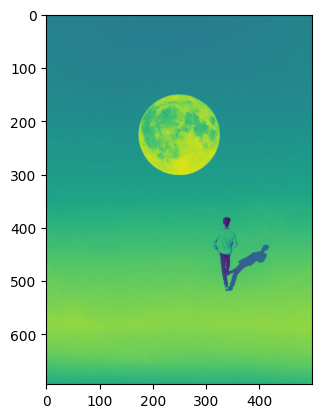

In [219]:
# print addition to see what happens

im_add2 = Image.fromarray(addition, 'L')
implot = plt.imshow(im_add2)
print(addition)

# is it what you expected? why or why not?
#Yes, this is closer to what I hadd expected.
# By converting the arrays to float, we are also averaging them, and then converting back to uint8!
# so it has a valid range of 0-255.

Find the mirror reflection of the photo with respect to the diagonal, by computing the tranpose of the array.

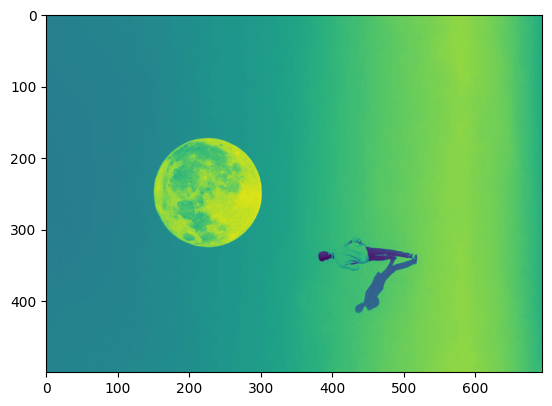

In [224]:
# compute transpose of our image to make it flat. run the code and see the image

im_addtranspose = np.transpose(addition)

im_addt = Image.fromarray(im_addtranspose, 'L')
imgplot = plt.imshow(im_addt)
